# India export in 20 years

This dataset describe the export and import of india within 20 years, and see what we can do about it.

First, let's import some package that might used in this project.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

We import the csv file into jupyter notebook with thousands as ','

In [2]:
data = pd.read_csv('india.csv',thousands=',')

Take a short glimpse about this dataset, it has 7 columns, which is country, export, import,total trade, trade balance, year(start) and year(end). The total trade is the sum of export and import, the trade balance indicate the difference of export and import. For the year columns, we can see that there were some year such as 97,98,99, indicate 1997,1998,1999 and they need to transform into the same format as 2000,2001...

In [3]:
data.head()

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
0,AFGHANISTAN,21.25,10.70,31.95,10.55,97,98
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,98,99
2,AFGHANISTAN,33.20,21.06,54.26,12.15,99,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


By checking the dtypes of the columns, we can see that as for now, the dtype of each columns has no big problem.

In [4]:
data.dtypes

Country           object
Export           float64
Import           float64
Total Trade      float64
Trade Balance    float64
Year(start)        int64
Year(end)          int64
dtype: object

Checking the info of the dataset, we can see that there some missing number in the export, import, total trade and trade balance.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5767 non-null   object 
 1   Export         5759 non-null   float64
 2   Import         5235 non-null   float64
 3   Total Trade    5201 non-null   float64
 4   Trade Balance  5201 non-null   float64
 5   Year(start)    5767 non-null   int64  
 6   Year(end)      5767 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 315.5+ KB


Using the describe function, we can see that despite the null value, the mean export is 818.34 and import is 1326.56, hence lead to the trade balance -429.80, which show that in total 20 years, india have more import than export, the resaon of causing this situation may due to its politis or somethings else.

In [6]:
data.describe()

,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
count,5759.000000,5235.000000,5201.000000,5201.000000,5767.000000,5767.000000
mean,818.347338,1326.562976,2240.639304,-429.802859,1788.698977,1862.839258
std,3043.716495,4659.827510,7203.524341,3486.694728,612.545456,511.506754
min,0.000000,0.000000,0.000000,-63047.160000,97.000000,98.000000
25%,3.150000,1.130000,12.920000,-27.110000,2003.000000,2004.000000
50%,46.370000,26.890000,131.170000,3.290000,2009.000000,2010.000000
75%,360.045000,442.755000,972.470000,66.980000,2015.000000,2016.000000
max,55786.380000,76380.700000,89714.230000,24442.380000,2021.000000,2022.000000


By filter those null values we can see that SAHARWI A.DM RP have the most null value.

In [16]:
data[data['Total Trade'].isnull()]['Country'].value_counts()

SAHARWI A.DM RP       21
CANARY IS             16
KIRIBATI REP          15
TUVALU                14
MONTSERRAT            14
                      ..
MAURITANIA             1
Petroleum Products     1
MAYOTTE                1
NAURU RP               1
ALBANIA                1
Name: Country, Length: 109, dtype: int64

We can see that the null value in the export and import, mainly cause it has no export or import, so in that two columns we can replace the null value to 0, and we can also calcuate the total trade and trade balance with the new export and import

In [33]:
data[data['Total Trade'].isnull()]

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
27,ALBANIA,0.91,NaN,NaN,NaN,99,2000
75,AMERI SAMOA,0.06,0.06,NaN,NaN,97,98
77,AMERI SAMOA,0.59,NaN,NaN,NaN,99,2000
78,AMERI SAMOA,0.71,NaN,NaN,NaN,2000,2001
79,AMERI SAMOA,0.19,NaN,NaN,NaN,2001,2002
...,...,...,...,...,...,...,...
5683,WALLIS F IS,0.21,NaN,NaN,NaN,2011,2012
5684,WALLIS F IS,0.02,NaN,NaN,NaN,2012,2013
5687,WALLIS F IS,0.01,NaN,NaN,NaN,2016,2017
5689,WALLIS F IS,0.02,NaN,NaN,NaN,2019,2020


Here we use 0 to replace to null value in import and export, and then recalculate the total trade and total balance.

In [42]:
data.fillna({'Import':0,'Export':0},inplace=True)
data['Total Trade'] = data.Export+data.Import
data['Trade Balance'] = data.Export - data.Import

There is no more null values, and the missing value is hanled properly.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5767 non-null   object 
 1   Export         5767 non-null   float64
 2   Import         5767 non-null   float64
 3   Total Trade    5767 non-null   float64
 4   Trade Balance  5767 non-null   float64
 5   Year(start)    5767 non-null   int64  
 6   Year(end)      5767 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 315.5+ KB


After dealing with the missing data, we rename the columns so that it is easier to type in, and we stored it in data_clean.

In [58]:
data_clean = data.rename(columns={'Export':'export','Import':'import',
                          'Total Trade':'total_trade','Trade Balance':'trade_balance',
                          'Year(start)':'start_year','Year(end)':'end_year'})

And now, we need to handle the date value, since they have some values such as 97,98 and 99 which make it hard to plot or read. Here, we define a function to deal with thoes values.

In [63]:
def tranform_calender(target):
    if target<100:
        target+=1900
    return target

In [66]:
data_clean.end_year = data_clean.end_year.apply(tranform_calender)
data_clean.start_year = data_clean.start_year.apply(tranform_calender)

Let's take another glimpse about the data, we can see that everything seems okey.

In [68]:
data_clean.head()

,Country,export,import,total_trade,trade_balance,start_year,end_year
0,AFGHANISTAN,21.25,10.70,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.20,21.06,54.26,12.14,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


Here, let's focus on the export first, the following code shows how to check the mean and max export number of each contry and sort them.

In [102]:
country_mean = data_clean.groupby('Country')['export'].mean().sort_values(ascending=False)
country_max = data_clean.groupby('Country')['export'].max().sort_values(ascending=False)
country_max = round(country_max,2)
country_mean = round(country_mean,2)

In this case, we only check the top 5 country of export, the following fig shows the top 5 mean export country. We can see that, USA is the major exporter to India, followed by U ARAB EMTS and CHINA. The amount of export to USA is nearly the sum of ARAB and CHINA

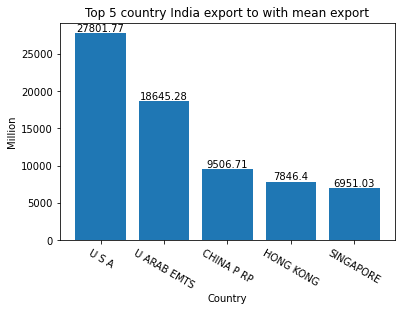

In [105]:
plt.bar(country_mean[:5].index,country_mean[:5].values)
plt.xlabel('Country')
plt.ylabel('Million')
plt.xticks(rotation=330)
plt.title('Top 5 country India export to with mean export')
for x, y in zip(country_mean[:5].index,country_mean[:5].values):
    plt.text(x,y+1,y,ha='center',va='bottom')


As for the max export, we can see that the top 3 still are USA, ARAB and CHINA, same as the mean export, the amount of max export of USA is the sum of ARAB and CHINA, combine with the fig above, we can draw a conclusion that USA the major exporter of India.

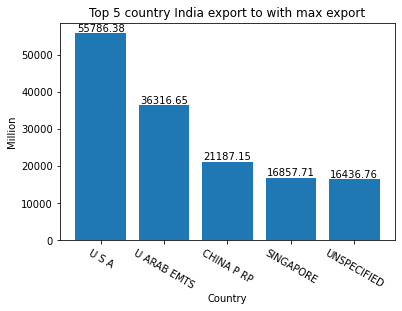

In [106]:
plt.bar(country_max[:5].index,country_max[:5].values)
plt.xlabel('Countrydr
plt.ylabel('Million')
plt.xticks(rotation=330)
plt.title('Top 5 country India export to with max export')
for x, y in zip(country_max[:5].index,country_max[:5].values):
    plt.text(x,y+1,y,ha='center',va='bottom')

Here, let's see the situation of import in India, almost same as the export, we do the same thing.

In [110]:
country_import_max = data_clean.groupby('Country')['import'].max().sort_values(ascending=False)
country_import_mean = data_clean.groupby('Country')['import'].mean().sort_values(ascending=False)
country_import_mean = round(country_import_mean,2)
country_import_max = round(country_import_max,2)

In [125]:
data_usa_export = data_clean[data_clean.Country=='U S A']['export']
data_cn_export = data_clean[data_clean.Country=='CHINA P RP']['export']
data_arab_export = data_clean[data_clean.Country=='U ARAB EMTS']['export']

We also plot the overall export number of the top 3 country in each year, we can see that the export amount to USA nearly keep going up every year, except 2001, 2009,2014 and 2020. As for China, it is obviously that the export amount starting to drop since 2011, same as Arab, but it bounced back in 2015. In thoes 20 years, the export amount to USA has increased 4 times.

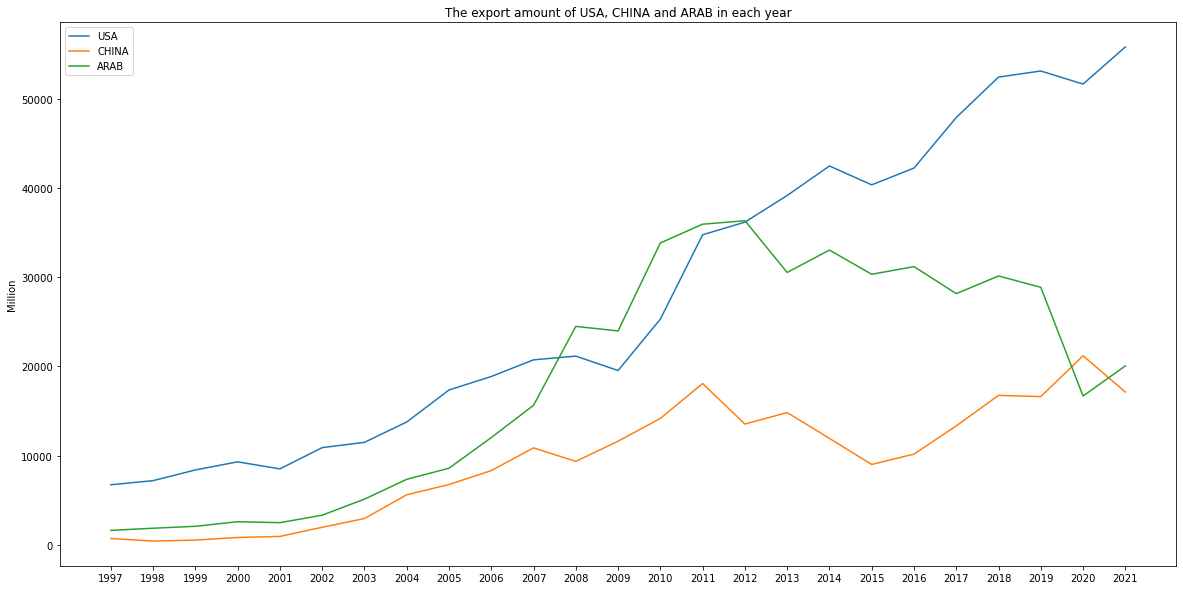

In [139]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1997,2022),data_usa_export,label='USA')
plt.plot(np.arange(1997,2022),data_cn_export,label='CHINA')
plt.plot(np.arange(1997,2022),data_arab_export,label='ARAB')
plt.xticks(np.arange(1997,2022))
plt.title('The export amount of USA, CHINA and ARAB in each year')
plt.ylabel('Million')
plt.legend()
plt.show()

Things changed a little when it comes to the mean import, we can see that China is the major importer to india with average of 34802.68 million a year, and USA the major exporter now is the third importer to India. Now the imort amount of CHINA is the sum of ARAB and USA.

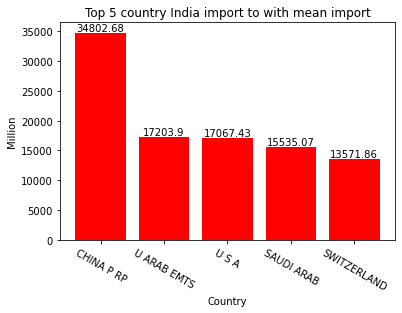

In [115]:
plt.bar(country_import_mean[:5].index,country_import_mean[:5].values,color='red')
plt.xlabel('Country')
plt.ylabel('Million')
plt.xticks(rotation=330)
plt.title('Top 5 country India import to with mean import')
for x, y in zip(country_import_mean[:5].index,country_import_mean[:5].values):
    plt.text(x,y+1,y,ha='center',va='bottom')

As for the max import number, there is no doubt that CHINA still is the highest, but USA, is replaced by SAUDI ARAB, Combining the mean import we can conclude that CHINA is the major importer to India. This result may shows that CHINA's export politics and USA's import politic may have some impact to the India' economic. 

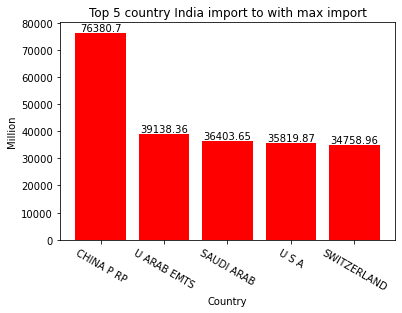

In [114]:
plt.bar(country_import_max[:5].index,country_import_max[:5].values,color='red')
plt.xlabel('Country')
plt.ylabel('Million')
plt.xticks(rotation=330)
plt.title('Top 5 country India import to with max import')
for x, y in zip(country_import_max[:5].index,country_import_max[:5].values):
    plt.text(x,y+1,y,ha='center',va='bottom')



In [140]:
data_usa_import = data_clean[data_clean.Country=='U S A']['import']
data_cn_import = data_clean[data_clean.Country=='CHINA P RP']['import']
data_arab_import = data_clean[data_clean.Country=='U ARAB EMTS']['import']

For the import amount, we can see that despite some year droping, the import amount of Chinam keeps going up, same as USA, but not as the same speend and scale as China, we can also see that since 2012, the import number pf Arab has droped, just as the export amount.

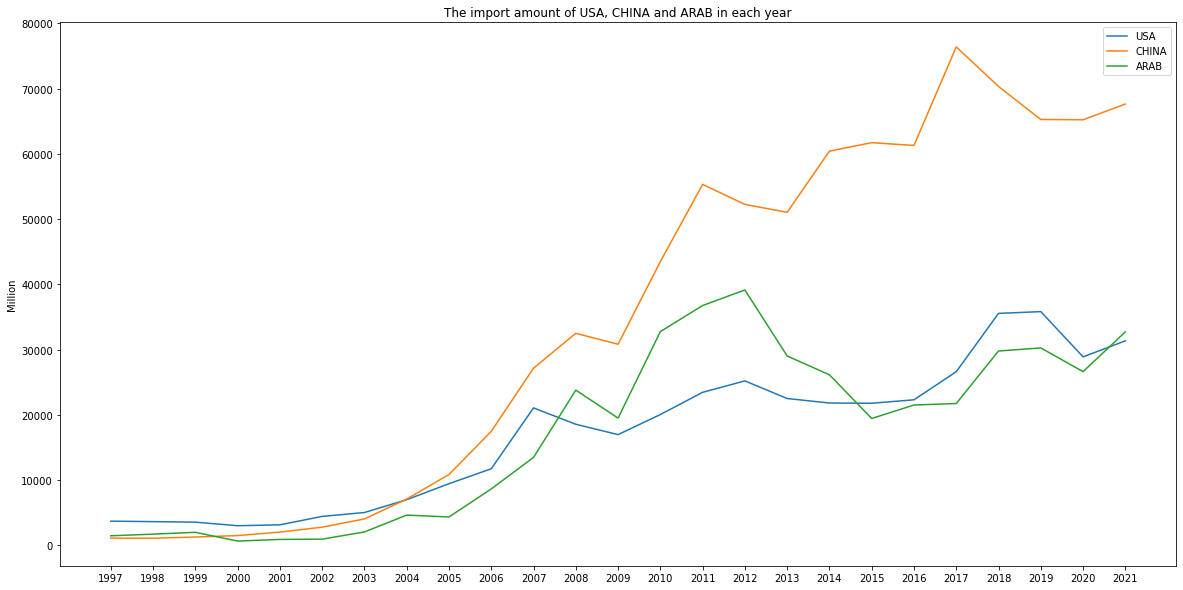

In [141]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1997,2022),data_usa_import,label='USA')
plt.plot(np.arange(1997,2022),data_cn_import,label='CHINA')
plt.plot(np.arange(1997,2022),data_arab_import,label='ARAB')
plt.xticks(np.arange(1997,2022))
plt.title('The import amount of USA, CHINA and ARAB in each year')
plt.ylabel('Million')
plt.legend()
plt.show()

In [182]:
data_export = data_clean.groupby('start_year')['export'].sum()
data_import = data_clean.groupby('start_year')['import'].sum()

The following fig shows the total mean export and import amount in India in each yaer, bascially, the export and import keep the same pace. When the export increased, the import also increased, and vice versa. It seems since 2011 the import and export politics in India have some 'problem'. Over the 20 years, the import amount increased nearly 7 times and export amount increased nearly 5 times.

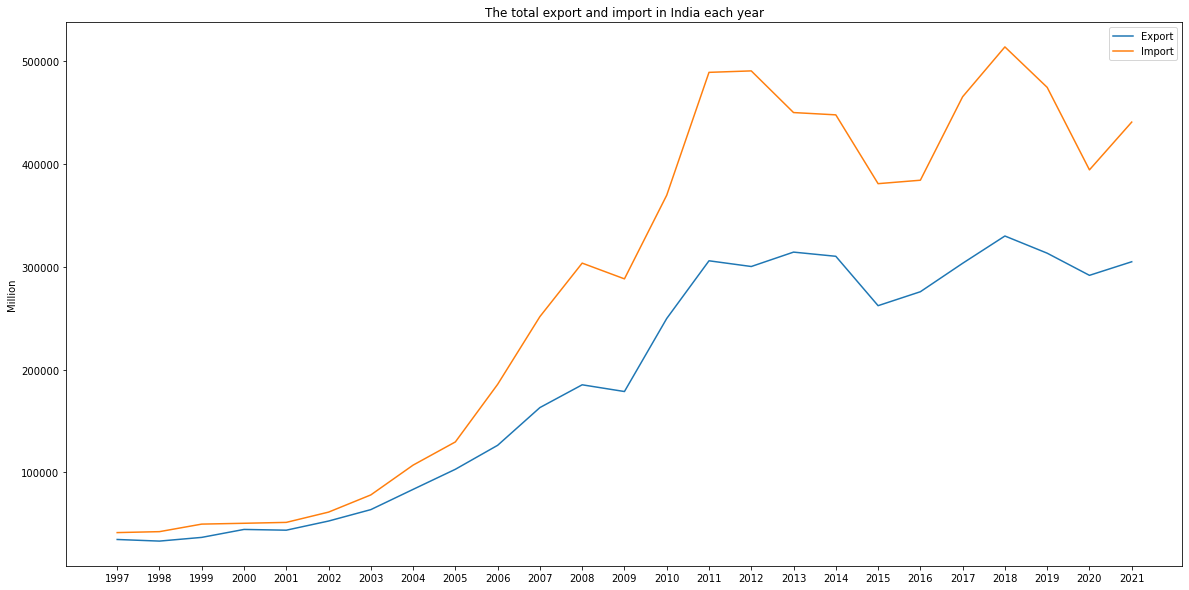

In [187]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1997,2022),data_export,label='Export')
plt.plot(np.arange(1997,2022),data_import,label='Import')
plt.xticks(np.arange(1997,2022))
plt.title('The total export and import in India each year')
plt.ylabel('Million')
plt.legend()
plt.show()

Here, we calculate the rate of export and import in each year, where the import rate peaked at 2006 with more than 41% and reached the lowest point at 2020 with -16%. The export rate reached the highest point at 2010 and the lowest at 2015.

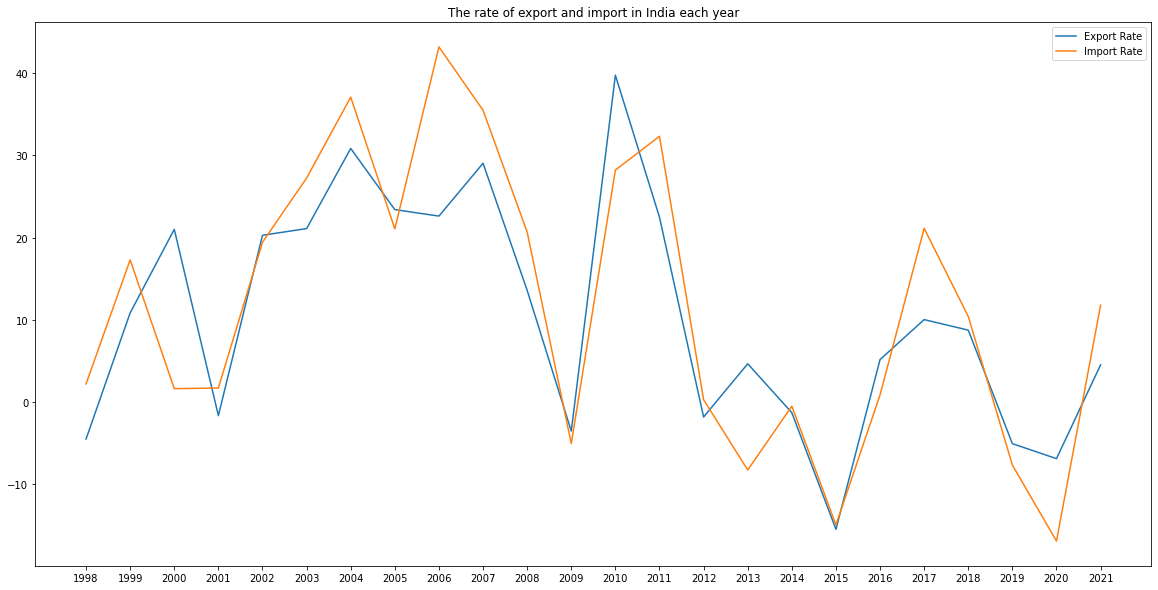

In [197]:
data_export_rate = (data_export[1:].reset_index(drop=True)/data_export[:-1].reset_index(drop=True))*100-100
data_import_rate = (data_import[1:].reset_index(drop=True)/data_import[:-1].reset_index(drop=True))*100-100
data_import_rate = round(data_import_rate,2)
data_export_rate = round(data_export_rate,2)
plt.figure(figsize=(20,10))
plt.plot(np.arange(1998,2022),data_export_rate,label='Export Rate')
plt.plot(np.arange(1998,2022),data_import_rate,label='Import Rate')
plt.xticks(np.arange(1998,2022))
plt.title('The rate of export and import in India each year')
plt.legend()
plt.show()

By observing the fig above, didnt full support that there might be some 'problem' in 2011 in india, we can use the total trade and trade balance to check it.

In [152]:
data_total_trade = data_clean.groupby('start_year')['total_trade'].sum()
data_trade_balance = data_clean.groupby('start_year')['trade_balance'].sum()

The result of total trade also shows that something might happened in 2011 that influence the import and export amount in India, meanwhile, the trade balance keep going down which indicates that as the time goes by, India is increasingly reliant on imports.

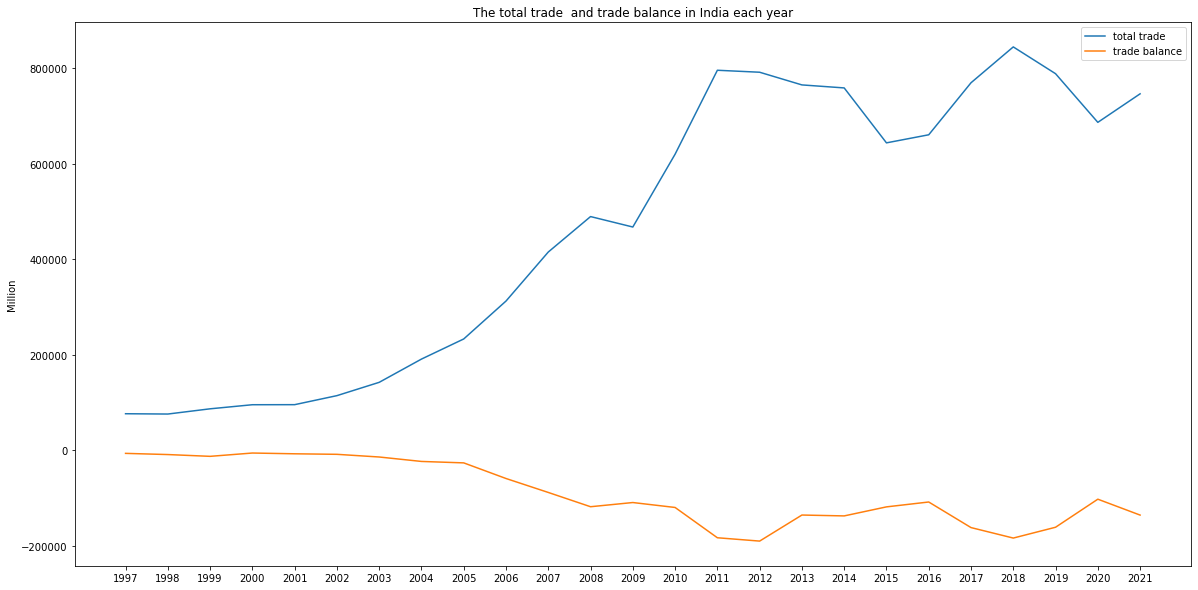

In [155]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1997,2022),data_total_trade,label='total trade')
plt.plot(np.arange(1997,2022),data_trade_balance,label='trade balance')
plt.xticks(np.arange(1997,2022))
plt.title('The total trade  and trade balance in India each year')
plt.ylabel('Million')
plt.legend()
plt.show()

This fig shows that the rate of total trade and trade balance in Inida each year, one things need to mention is that, the trade balance in India each year is minus 0, which means that the higher the trade balance rate, means there was a bigger drop of trade balance that year.

The maxium of total trade rate is 25%, however in trade balance is 120%, thats huge!

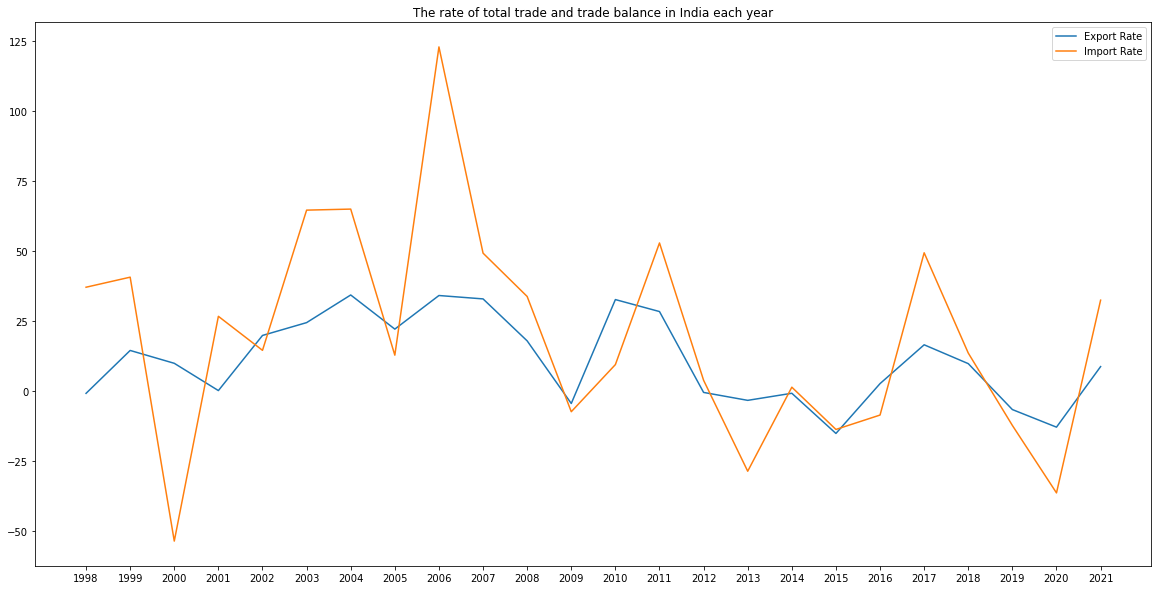

In [198]:
data_trade_rate = (data_total_trade[1:].reset_index(drop=True)/data_total_trade[:-1].reset_index(drop=True))*100-100
data_balance_rate = (data_trade_balance[1:].reset_index(drop=True)/data_trade_balance[:-1].reset_index(drop=True))*100-100
data_trade_rate = round(data_trade_rate,2)
data_balance_rate = round(data_balance_rate,2)
plt.figure(figsize=(20,10))
plt.plot(np.arange(1998,2022),data_trade_rate,label='Export Rate')
plt.plot(np.arange(1998,2022),data_balance_rate,label='Import Rate')
plt.xticks(np.arange(1998,2022))
plt.title('The rate of total trade and trade balance in India each year')
plt.legend()
plt.show()

# Conclusion

In this project, we analyse the export and import situdation of India in 20 years, although is not a huge dataset, and it may lack some feature, and we handle the missing value by replace them with 0. By transform some data, we get some useful infos.

First, USA is the major exporter of India which with mean export amount 27801 million, followed by ARAB and CHINA, for the major importer, China comes first than ARAB and SAUDI ARAB, which USA is the fourth.

Second, in thoes 20 years, the exprot amount to USA maintain an upward trend, however, the trend in China and ARAB since 2011, start rocking back and forth. As for the import amount, the import amount from China peaked at 2017, however, in the following 3 years, the imports kept dropping. Bascially, the import amount of USA,CHINA, ARAB share same tendency but with different scale which is different than the situation in export amount.

Third, by observing the total trade and trade balance in overall 20 years, since 2011, the total trade of India kept bouncing back between 800,000 and 600,000, but the trade balance kept going up.

Thanks!!!